# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1.

# Importing Data

In [5]:
path = r'C:\Users\drbar\Documents\Career Foundry\Projects\04 - 25 Instacart Basket Analysis'

In [6]:
df49 = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','df49_merge.pkl'))

In [7]:
# Checking the dataframe
df49.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_regularity,first_name,last_name,gender,state,age,date_joined,dependents,fam_status,income
0,196,Soda,77,7,9.0,431534,1,5,4,15,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,196,Soda,77,7,9.0,473747,1,3,3,12,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,196,Soda,77,7,9.0,550135,1,7,1,9,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,196,Soda,77,7,9.0,2254736,1,4,4,7,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,196,Soda,77,7,9.0,2295261,1,9,1,16,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 2.

In [9]:
# Columns containing PII are removed before moving forward with analysis
df410 = df49.drop(columns = ['first_name','last_name'])

In [10]:
# Confirming the removal of PII
df410.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_days',
       'hourly_order_flag', 'max_order', 'loyalty_flag',
       'average_user_item_price', 'spending_habit',
       'average_days_since_prior_order', 'order_regularity', 'gender', 'state',
       'age', 'date_joined', 'dependents', 'fam_status', 'income'],
      dtype='object')

In [11]:
df410.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,spending_habit,average_days_since_prior_order,order_regularity,gender,state,age,date_joined,dependents,fam_status,income
0,196,Soda,77,7,9.0,431534,1,5,4,15,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,196,Soda,77,7,9.0,473747,1,3,3,12,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,196,Soda,77,7,9.0,550135,1,7,1,9,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,196,Soda,77,7,9.0,2254736,1,4,4,7,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,196,Soda,77,7,9.0,2295261,1,9,1,16,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# 3a.

In [13]:
# Using a for loop to create and populate a 'region' column, sorting the 'state' column
region = []

for value in df410["state"]:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut', 'New York','Pennsylvania','New Jersey']:
        region.append("Northeast")
    elif value in ['Wisconsin', 'Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append("Midwest")
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida',
                'Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append("South")
    elif value in ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']:
        region.append("West")
    else:
        region.append("Unknown Region")

In [14]:
# Creating an object of the 'region' column
df410['region'] = region

In [15]:
# Testing to make sure every state made it into a region
df410['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [16]:
# Used to find which states end up in 'Unkown Region'
unknown_states = df410[df410['region'] == 'Unknown Region']['state'].unique()

In [17]:
# Returns states ending up in 'Unknown Region'
print(unknown_states)

[]


## 3b.

In [19]:
# Creating a groupby obeject to compare each regions spending habit.
spending_counts = df410.groupby('region')['spending_habit'].value_counts()

In [20]:
# Region 3 holds the highest count customers total, holding the lead for both 'low spender' and 'high spender' categories.
print(spending_counts)

region     spending_habit
Midwest    Low spender        7441350
           High spender        155975
Northeast  Low spender        5614511
           High spender        108225
South      Low spender       10582194
           High spender        209691
West       Low spender        8132559
           High spender        160354
Name: count, dtype: int64


# 4.

In [22]:
# Checking the data set to assess how I will make a flag for user_id with less than 5 orders.
# I have decided to make a flag for count of 'order_id' per 'user_id'
df410.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,average_days_since_prior_order,order_regularity,gender,state,age,date_joined,dependents,fam_status,income,region
0,196,Soda,77,7,9.0,431534,1,5,4,15,...,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,196,Soda,77,7,9.0,473747,1,3,3,12,...,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,196,Soda,77,7,9.0,550135,1,7,1,9,...,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,196,Soda,77,7,9.0,2254736,1,4,4,7,...,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,196,Soda,77,7,9.0,2295261,1,9,1,16,...,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [23]:
# Grouping 'user_id' by 'order_id' in a new object.
user_order_df = df410.groupby('user_id')['order_id'].nunique().reset_index(name='order_count')

In [24]:
# Checking results
user_order_df.head()

,user_id,order_count
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


In [25]:
# Creating a flag for customers with less than 5 orders
user_order_df['low_order_flag'] = user_order_df['order_count'] < 5

In [26]:
# Merging the flag with the main dataframe
df410 = df410.merge(user_order_df[['user_id','low_order_flag']], on = 'user_id', how='left')

In [27]:
# Checking results
df410.head(10)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_regularity,gender,state,age,date_joined,dependents,fam_status,income,region,low_order_flag
0,196,Soda,77,7,9.0,431534,1,5,4,15,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False
1,196,Soda,77,7,9.0,473747,1,3,3,12,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False
2,196,Soda,77,7,9.0,550135,1,7,1,9,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False
3,196,Soda,77,7,9.0,2254736,1,4,4,7,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False
4,196,Soda,77,7,9.0,2295261,1,9,1,16,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False
5,196,Soda,77,7,9.0,2398795,1,2,3,7,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False
6,196,Soda,77,7,9.0,2539329,1,1,2,8,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False
7,196,Soda,77,7,9.0,2550362,1,10,4,8,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False
8,196,Soda,77,7,9.0,3108588,1,8,1,14,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False
9,196,Soda,77,7,9.0,3367565,1,6,2,7,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False


In [28]:
# Checking the results
df410['low_order_flag'].value_counts()

low_order_flag
False    30964518
True      1440341
Name: count, dtype: int64

In [29]:
# Removing row's flagged with fewer than 5 orders
df410 = df410[df410['low_order_flag'] == False]

In [30]:
# Checking the results
df410['low_order_flag'].value_counts()

low_order_flag
False    30964518
Name: count, dtype: int64

In [31]:
# Removing the 'low_order_flag' from the dataframe
df410 = df410.drop(columns = ['low_order_flag'])

In [32]:
# Checking results 
df410.tail(10)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,average_days_since_prior_order,order_regularity,gender,state,age,date_joined,dependents,fam_status,income,region
32404849,41213,French Loaf,112,3,4.8,3154581,206209,1,3,11,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest
32404850,41665,Organic Mexican Blend Finely Shredded Cheese,21,16,4.7,688306,206209,4,1,10,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest
32404851,43961,Organic Peeled Whole Baby Carrots,123,4,3.8,626363,206209,12,1,12,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest
32404852,43961,Organic Peeled Whole Baby Carrots,123,4,3.8,688306,206209,4,1,10,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest
32404853,43961,Organic Peeled Whole Baby Carrots,123,4,3.8,2129269,206209,8,3,17,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest
32404854,44325,Elbow Macaroni Pasta,131,9,1.8,550836,206209,7,2,13,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest
32404855,48370,Sensitive Toilet Paper,54,17,7.4,1854736,206209,11,4,10,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest
32404856,48697,Canola Oil,19,13,8.3,550836,206209,7,2,13,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest
32404857,48742,Quick 1 Minute Whole Grain Oats,130,14,5.9,550836,206209,7,2,13,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest
32404858,48742,Quick 1 Minute Whole Grain Oats,130,14,5.9,626363,206209,12,1,12,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest


##  5.

In [34]:
# Creating profiles based on shopper's habits and qualities

In [35]:
# Creating an age group flag
age_group = []
    
for value in df410['age']:
        if value < 25:
            age_group.append('Young Adult')
        elif 25 <= value < 60:
            age_group.append('Adult')
        elif value >= 60:
            age_group.append('Senior')
        else:
            age_group.append('Unknown')
df410['age_group'] = age_group

In [36]:
# Checking population of the 'age_group' column
df410['age_group'].value_counts()

age_group
Adult          16974831
Senior         10574493
Young Adult     3415194
Name: count, dtype: int64

In [37]:
# Creating an income group flag 
income_group = []

for value in df410['income']:
    if pd.isnull(value):
        income_group.append('Unknown')
    elif value > 120000:
        income_group.append('High Income')
    elif 40000 < value <= 120000:
        income_group.append('Average Income')
    else:
        income_group.append('Low Income')

df410['income_group'] = income_group

In [38]:
# Checking population of the 'income_group' column
df410['income_group'].value_counts()

income_group
Average Income    20173016
High Income        9179477
Low Income         1612025
Name: count, dtype: int64

In [39]:
# Creating a flag for dependents
has_dependents = []
for value in df410['dependents']:
    if value >= 1:
        has_dependents.append('has_dependents')
    elif value <1:
        has_dependents.append('no_dependents')

df410['has_dependents'] = has_dependents

In [40]:
# Checking population of the 'has_dependents' column
df410['has_dependents'].value_counts()

has_dependents
has_dependents    23224872
no_dependents      7739646
Name: count, dtype: int64

In [41]:
# Flag users who bought from pet department
pet_owners = df410[df410['department_id'] == 8]['user_id'].unique()

In [221]:
# Create a flag for 'pet_owner'
# Create a list of user_ids who have purchased from department_id 8 (pet department)
pet_owners = df410[df410['department_id'] == 8]['user_id'].unique()

In [223]:
# Create the pet_owner flag
df410['pet_owner'] = df410['user_id'].apply(lambda x: 'has_pets' if x in pet_owners else 'no_pets')

In [224]:
df410['pet_owner'].value_counts()

pet_owner
no_pets     27513167
has_pets     3451351
Name: count, dtype: int64

In [44]:
df410.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_days',
       'hourly_order_flag', 'max_order', 'loyalty_flag',
       'average_user_item_price', 'spending_habit',
       'average_days_since_prior_order', 'order_regularity', 'gender', 'state',
       'age', 'date_joined', 'dependents', 'fam_status', 'income', 'region',
       'age_group', 'income_group', 'has_dependents', 'pet_owner'],
      dtype='object')

# 6.

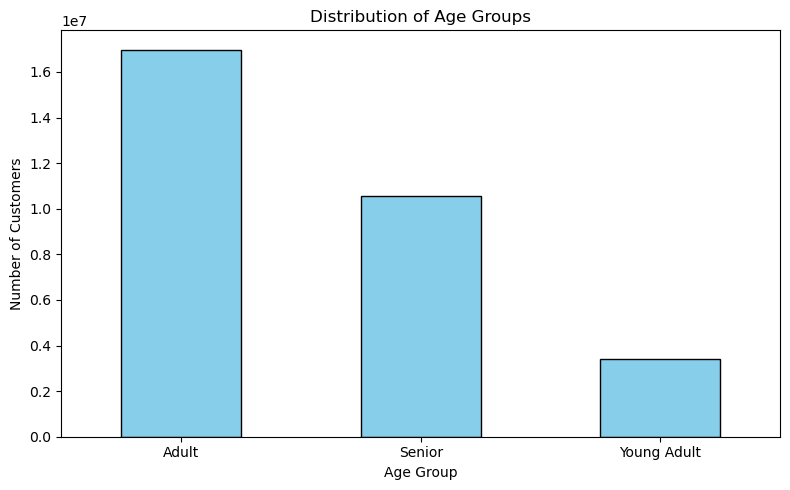

In [46]:
# Creating a visualization for age_group
age_counts = df410['age_group'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
age_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

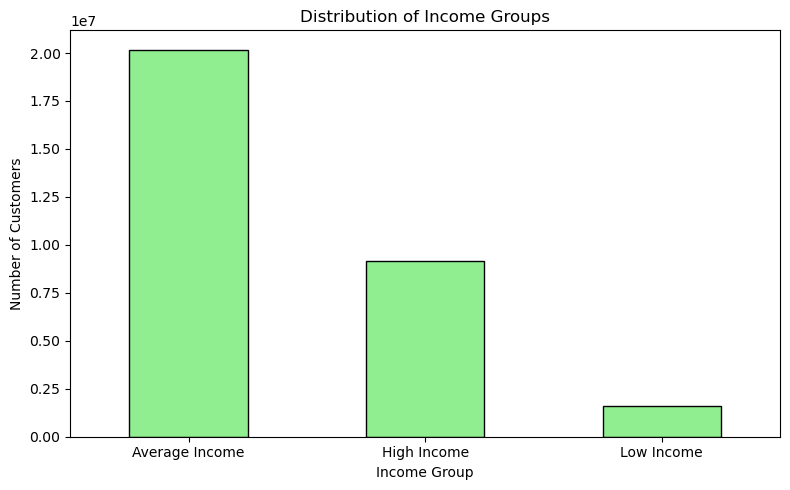

In [47]:
# Creating a visualization for income_group
income_counts = df410['income_group'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
income_counts.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Distribution of Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

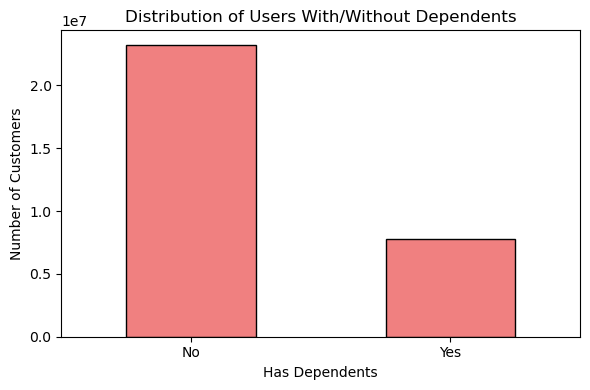

In [48]:
# Creating a visualization for has_dependents
dependents_counts = df410['has_dependents'].value_counts()

# Plot
plt.figure(figsize=(6,4))
dependents_counts.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.title('Distribution of Users With/Without Dependents')
plt.xlabel('Has Dependents')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()

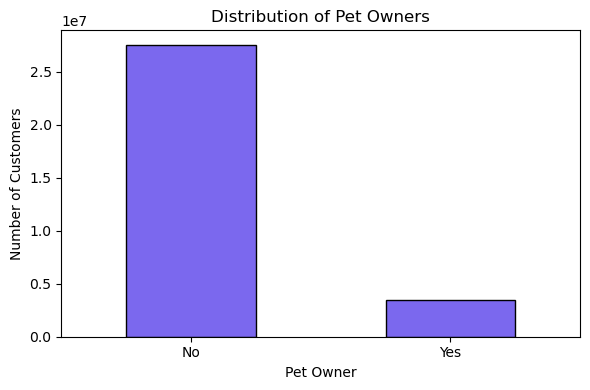

In [225]:
# Creating a visualization for pet_owner
pet_counts = df410['pet_owner'].value_counts()

# Plot
plt.figure(figsize=(6,4))
pet_counts.plot(kind='bar', color='mediumslateblue', edgecolor='black')

plt.title('Distribution of Pet Owners')
plt.xlabel('Pet Owner')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()

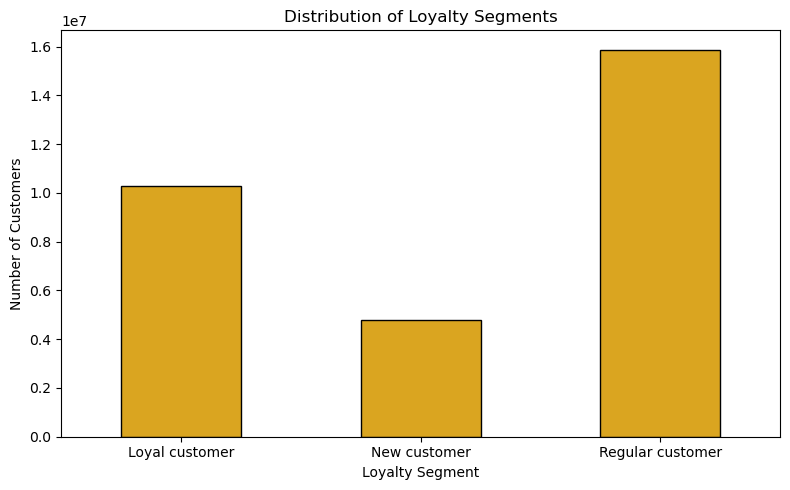

In [50]:
# Creating a visualization for loyalty_flag
loyalty_counts = df410['loyalty_flag'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
loyalty_counts.plot(kind='bar', color='goldenrod', edgecolor='black')

plt.title('Distribution of Loyalty Segments')
plt.xlabel('Loyalty Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

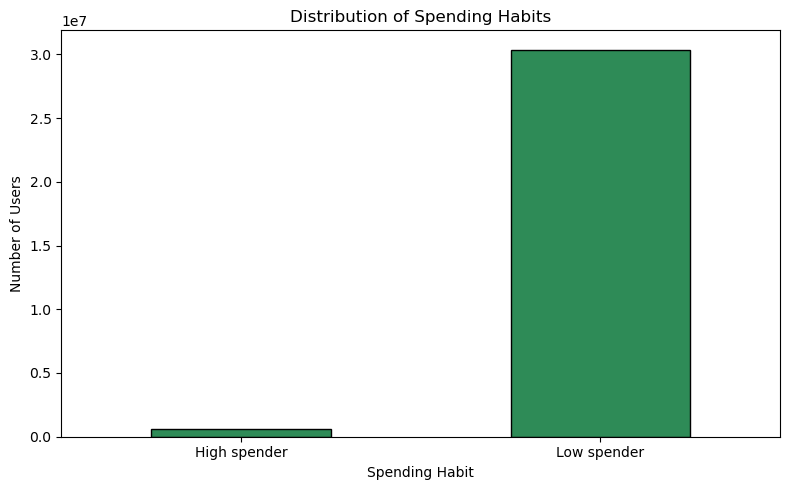

In [51]:
# Creating a visualization for spending_habit
spending_counts = df410['spending_habit'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
spending_counts.plot(kind='bar', color='seagreen', edgecolor='black')

plt.title('Distribution of Spending Habits')
plt.xlabel('Spending Habit')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 7.

In [53]:
# Aggregating 'loyalty flag' by 'order_number' and 'prices'
df410.groupby('loyalty_flag').agg({
    'order_number': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']})

order_number                prices                
                          min       mean max    min      mean   max
loyalty_flag                                                       
Loyal customer              1  32.641196  99    1.0  7.773575  25.0
New customer                1   4.268300  10    1.0  7.801655  25.0
Regular customer            1  12.347452  40    1.0  7.798262  25.0

In [54]:
# Aggregating 'spending_habit' by 'order_number' and 'prices'
df410.groupby('spending_habit').agg({
    'order_number': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']})

order_number                prices                
                        min       mean max    min      mean   max
spending_habit                                                   
High spender              1  18.742938  99    1.0  8.231915  25.0
Low spender               1  17.816101  99    1.0  7.781888  25.0

In [55]:
# Creating a crosstab for 'loyalty_flag' by 'spending_habit
pd.crosstab(df410['loyalty_flag'], df410['spending_habit'])

spending_habit,High spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,84009,4719640
Regular customer,302814,15573962


In [56]:
# Crosstab: age_group vs income_group
# Helps answer: “What classifications does the demographic information suggest?”
pd.crosstab(df410['age_group'], df410['income_group'], margins=True)

income_group,Average Income,High Income,Low Income,All
age_group,,,,
Adult,11725916,4319803,929112,16974831
Senior,5310636,4817570,446287,10574493
Young Adult,3136464,42104,236626,3415194
All,20173016,9179477,1612025,30964518


In [57]:
# Crosstab: age_group vs loyalty_flag
# Helps answer: “Is there a connection between age and loyalty?”
pd.crosstab(df410['age_group'], df410['loyalty_flag'], margins=True)

loyalty_flag,Loyal customer,New customer,Regular customer,All
age_group,,,,
Adult,5625738,2626608,8722485,16974831
Senior,3514773,1649964,5409756,10574493
Young Adult,1143582,527077,1744535,3415194
All,10284093,4803649,15876776,30964518


In [58]:
# Crosstab: income_group vs spending_habit
# Helps answer: “How do spending habits differ by income level?”
pd.crosstab(df410['income_group'], df410['spending_habit'], margins=True)

spending_habit,High spender,Low spender,All
income_group,,,
Average Income,135071,20037945,20173016
High Income,468352,8711125,9179477
Low Income,0,1612025,1612025
All,603423,30361095,30964518


In [59]:
# Crosstab: age_group vs spending_habit
# Helps answer: “Do younger or older customers spend differently?”
pd.crosstab(df410['age_group'], df410['spending_habit'], margins=True)

spending_habit,High spender,Low spender,All
age_group,,,
Adult,329791,16645040,16974831
Senior,207166,10367327,10574493
Young Adult,66466,3348728,3415194
All,603423,30361095,30964518


In [60]:
# Crosstab: has_dependents vs loyalty_flag
# Helps answer: “Are customers with families more loyal?”
pd.crosstab(df410['has_dependents'], df410['loyalty_flag'], margins=True)

loyalty_flag,Loyal customer,New customer,Regular customer,All
has_dependents,,,,
has_dependents,7695249,3602419,11927204,23224872
no_dependents,2588844,1201230,3949572,7739646
All,10284093,4803649,15876776,30964518


In [61]:
# Crosstab: pet_owner vs spending_habit
# Helps answer: “Do pet owners tend to spend more or less?”
pd.crosstab(df410['pet_owner'], df410['spending_habit'], margins=True)

spending_habit,High spender,Low spender,All
pet_owner,,,
has_pets,124224,3327127,3451351
no_pets,479199,27033968,27513167
All,603423,30361095,30964518


Loyalty segments showed clear differences in order activity, with Loyal customers placing more frequent and consistent orders compared to New and Regular customers.

Spending habits revealed that High spenders consistently spent more per product, though their order frequency did not significantly exceed that of Low spenders.

Crosstab comparisons across demographics and behavior (e.g., age_group vs income_group, loyalty_flag vs spending_habit, has_dependents, and pet_owner) provided insights into how factors like age, income, and family status influence purchasing behavior and loyalty.

These findings help define distinct shopper profiles that can be used to tailor marketing strategies, prioritize customer retention efforts, and personalize product recommendations.

# 8.

In [64]:
# Crosstab: income_group vs region
# Helps answer: "Does income level vary significantly by region?"
pd.crosstab(df410['region'], df410['income_group'], normalize='index').round(2)

income_group,Average Income,High Income,Low Income
region,,,
Midwest,0.65,0.30,0.05
Northeast,0.65,0.30,0.05
South,0.65,0.29,0.05
West,0.65,0.29,0.05


In [65]:
# Crosstab: spending_habit vs region
# Helps answer: "Are certain regions more likely to spend more or less?"
pd.crosstab(df410['region'], df410['spending_habit'], normalize='index').round(3)

spending_habit,High spender,Low spender
region,,
Midwest,0.020,0.980
Northeast,0.019,0.981
South,0.019,0.981
West,0.019,0.981


In [66]:
# Crosstab: has_dependents vs region
# Helps answer: "Are families with dependents concentrated in specific regions?"
pd.crosstab(df410['region'], df410['has_dependents'], normalize='index').round(3)

has_dependents,has_dependents,no_dependents
region,,
Midwest,0.749,0.251
Northeast,0.752,0.248
South,0.750,0.250
West,0.750,0.250


In [67]:
# Crosstab: has_pets vs region
# Helps answer: "Do pet ownership rates vary across regions?"
pd.crosstab(df410['region'], df410['pet_owner'], normalize='index').round(3)

pet_owner,has_pets,no_pets
region,,
Midwest,0.114,0.886
Northeast,0.109,0.891
South,0.108,0.892
West,0.115,0.885


In [68]:
# Crosstab: spending_habit vs department
# Helps answer: "Which departments attract high vs. low spenders?"
pd.crosstab(df410['department_id'], df410['spending_habit'], normalize='index').round(2)

spending_habit,High spender,Low spender
department_id,,
1,0.02,0.98
2,0.03,0.97
3,0.03,0.97
4,0.01,0.99
5,0.09,0.91
6,0.02,0.98
7,0.02,0.98
8,0.04,0.96
9,0.02,0.98


In [69]:
# Crosstab: income_group vs department
# Helps answer: "Do income levels correlate with interest in certain departments?"
pd.crosstab(df410['department_id'], df410['income_group'], normalize='index').round(2)

income_group,Average Income,High Income,Low Income
department_id,,,
1,0.65,0.30,0.05
2,0.64,0.30,0.06
3,0.65,0.31,0.04
4,0.66,0.30,0.04
5,0.62,0.32,0.06
6,0.66,0.30,0.04
7,0.64,0.28,0.07
8,0.63,0.32,0.05
9,0.66,0.31,0.04


In [70]:
# Crosstab: has_dependents vs department
# Helps answer: "Are shoppers with dependents drawn to specific product types?"
pd.crosstab(df410['department_id'], df410['has_dependents'], normalize='index').round(2)

has_dependents,has_dependents,no_dependents
department_id,,
1,0.75,0.25
2,0.75,0.25
3,0.75,0.25
4,0.75,0.25
5,0.75,0.25
6,0.75,0.25
7,0.75,0.25
8,0.75,0.25
9,0.75,0.25


### Task 8: Compare Customer Profiles with Regions and Departments

To identify possible links between customer behavior and geography or product focus, I created several crosstab analyses across key variables like `income_group`, `spending_habit`, `has_dependents`, and `pet_owner`, grouped by both `region` and `department_id`.

#### Regional Trends:
- **Income Group**: The West and South regions had the highest proportions of low-income shoppers (54–55%), while the Midwest and Northeast showed slightly higher average incomes.
- **Spending Habit**: Virtually all regions had a similar low percentage (~2%) of high spenders, indicating minimal regional impact on spending level.
- **Dependents**: Roughly 75% of customers in all regions have dependents — again, showing no meaningful geographic skew.
- **Pet Ownership**: Pet ownership was low across all regions, with the Midwest and West slightly higher (11.5%) than the South (10.8%).

#### Departmental Trends:
- **Spending Habit**: Department 5 stood out with 9% high spenders — the highest of any department — while others hovered between 1–4%.
- **Income Group**: Departments 8 and 19 had the **highest low-income shopper rates** (60%+), while departments 12 and 18 had more balanced distributions.
- **Dependents**: All departments showed a 75–76% "has_dependents" rate, but a few had slightly higher or lower values (e.g., department 10 and 17 had 76%).

#### Conclusion:
While **regional segmentation reveals modest differences**, especially in income group proportions, the more actionable insights came from comparing behavior **by department**. Certain departments clearly attract higher-income and higher-spending shoppers, suggesting these product types could be targeted for premium marketing. Conversely, other departments are frequented more by low-income or budget-conscious customers, which may inform pricing or bundling strategies.



# 9. 

In [73]:
df410.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_days',
       'hourly_order_flag', 'max_order', 'loyalty_flag',
       'average_user_item_price', 'spending_habit',
       'average_days_since_prior_order', 'order_regularity', 'gender', 'state',
       'age', 'date_joined', 'dependents', 'fam_status', 'income', 'region',
       'age_group', 'income_group', 'has_dependents', 'pet_owner'],
      dtype='object')

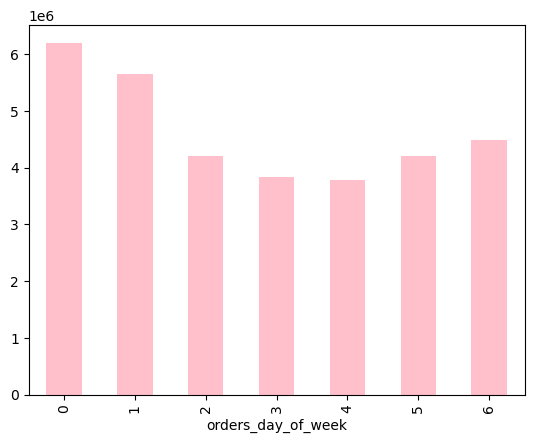

In [74]:
# Creating a bar chart in order of column index
df49['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'pink')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_day_of_week.png'))

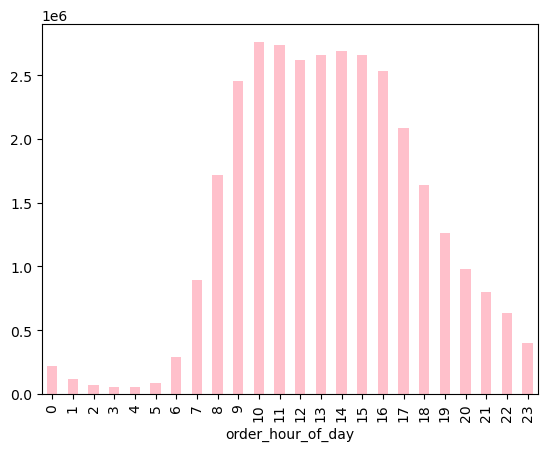

In [75]:
# Creating a bar chart representing "order_hour_of_day" in index order
order_hour_of_day_bar = df49['order_hour_of_day'].value_counts().sort_index().plot.bar(color = 'pink')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_hour_of_day.png'))

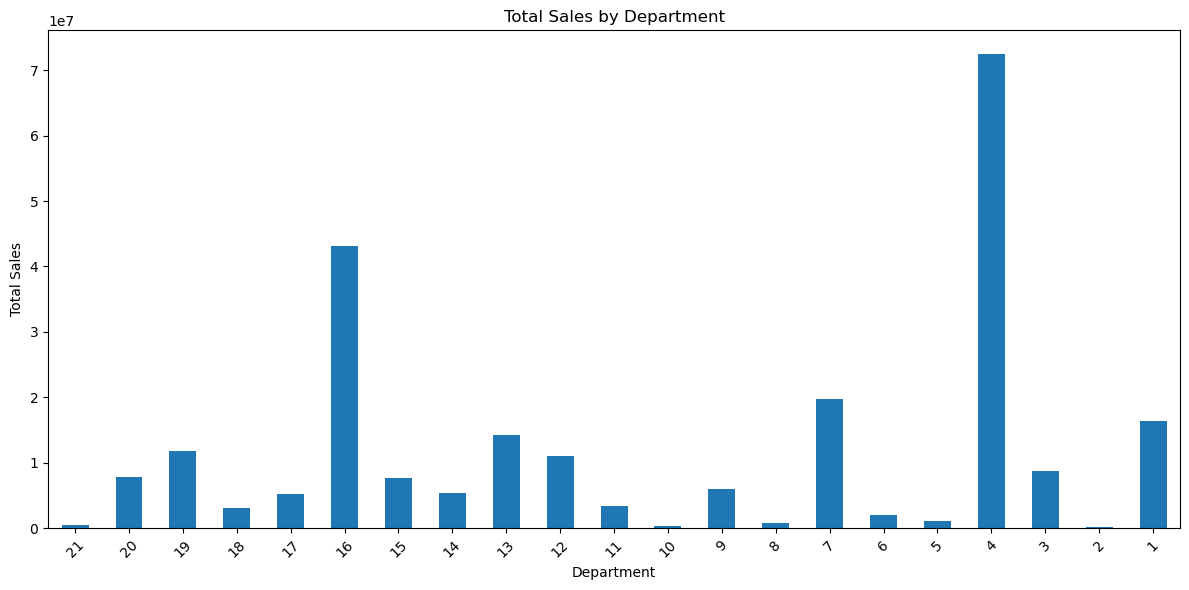

In [76]:
# Total sales per department
dept_sales_value = df410.groupby('department_id')['prices'].sum().sort_index(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
dept_sales_value.plot(kind='bar')
plt.title('Total Sales by Department')
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_sales_by_department.png'))
plt.show()

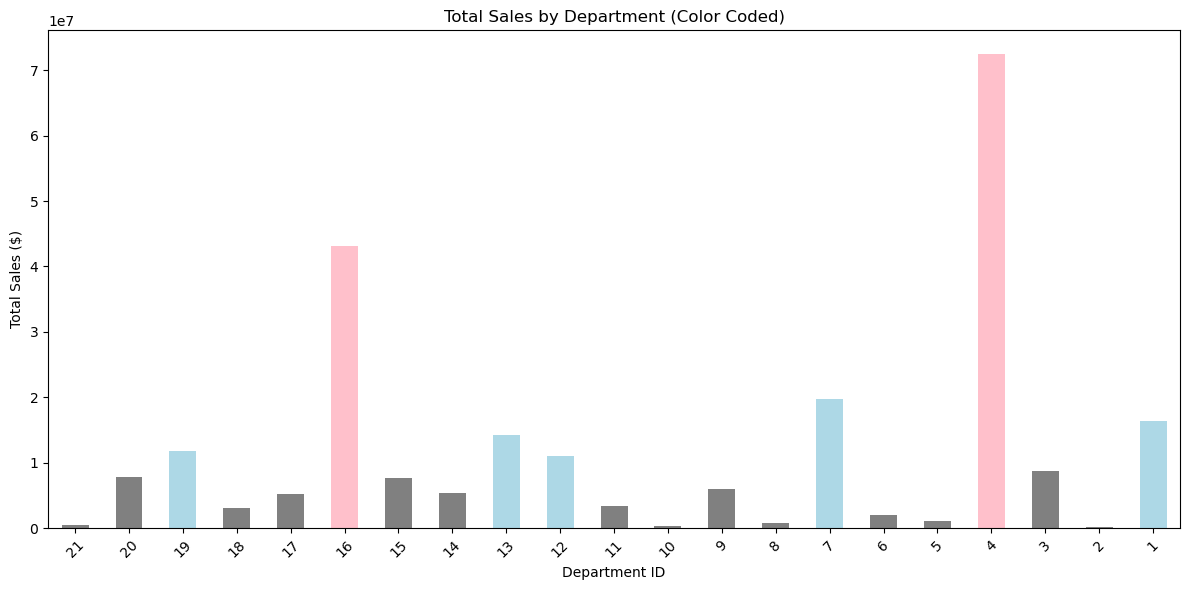

In [77]:
# Aggregate total sales by department_id
dept_sales_value = df410.groupby('department_id')['prices'].sum().sort_index(ascending=False)

# Define color based on thresholds (in 1e7 units)
colors = [
    'pink' if val > 3e7 else 'yellow' if val > 2e7 else 'lightblue' if val > 1e7 else 'gray' 
    for val in dept_sales_value
]

# Plot
plt.figure(figsize=(12, 6))
dept_sales_value.plot(kind='bar', color=colors)

plt.title('Total Sales by Department (Color Coded)')
plt.xlabel('Department ID')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_sales_by_department_colored.png'), bbox_inches='tight')
plt.show()

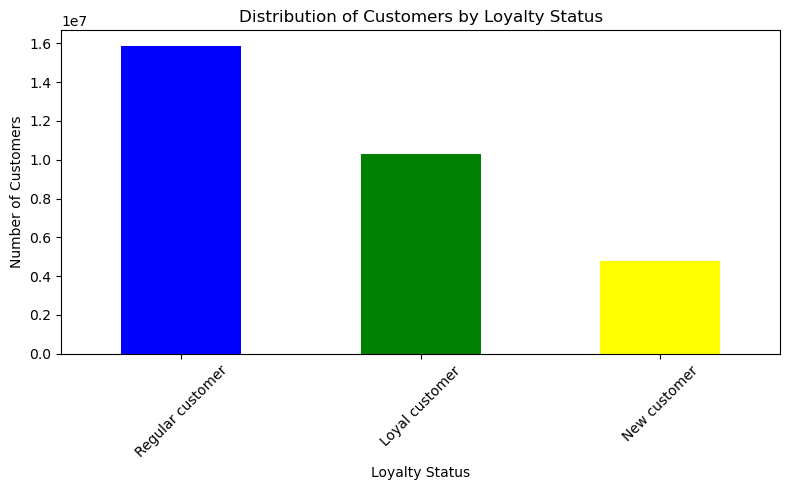

In [78]:
# Creating a "loyalty_flag" bar chart
plt.figure(figsize=(8,5))
loyalty_flag_bar = df410['loyalty_flag'].value_counts().plot.bar(color=['blue', 'green', 'yellow'])
plt.title('Distribution of Customers by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()  # Also helps reduce cutting
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'), bbox_inches='tight')
plt.show()

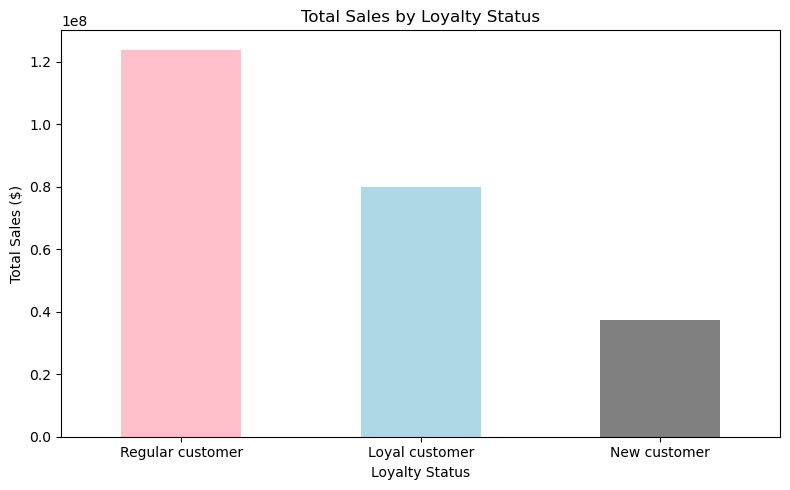

In [161]:
# Aggregate total sales by loyalty_flag
loyalty_sales = df410.groupby('loyalty_flag')['prices'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
loyalty_sales.plot(kind='bar', color=['pink', 'lightblue', 'grey'])

plt.title('Total Sales by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_sales.png'), bbox_inches='tight')
plt.show()

<Figure size 1200x600 with 0 Axes>

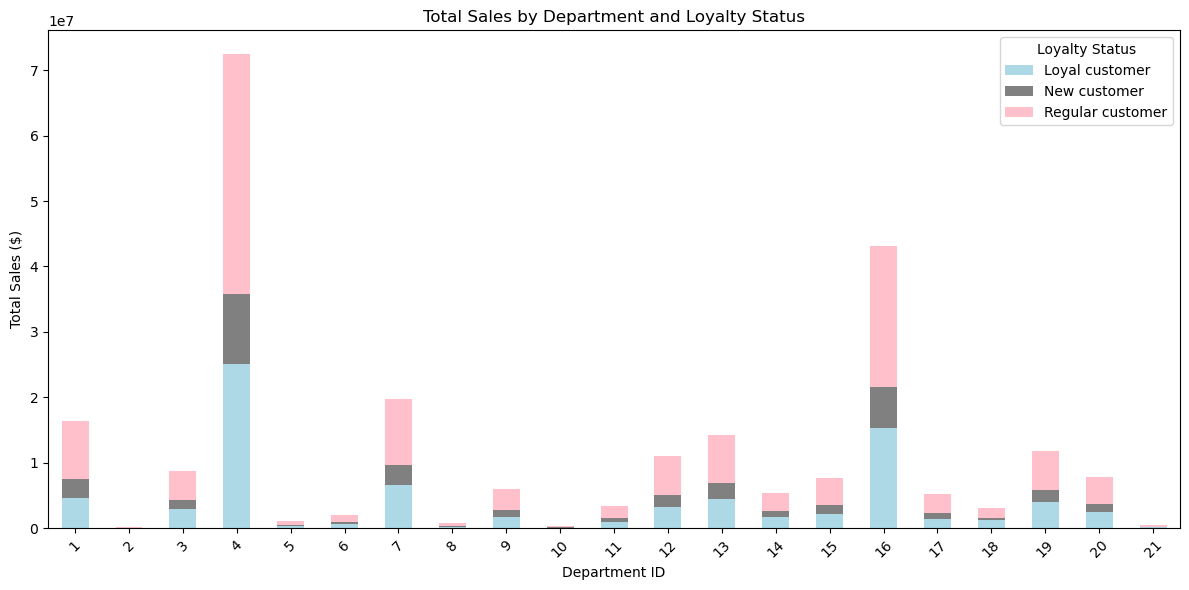

In [171]:
# Aggregate total sales by department and loyalty_flag
dept_loyalty_sales = df410.groupby(['department_id', 'loyalty_flag'])['prices'].sum().unstack().fillna(0)

# Define color order to match the column order exactly
color_map = {
    'Loyal customer': 'lightblue',
    'New customer': 'grey',
    'Regular customer': 'pink'
}

# Plot as stacked bar chart with custom colors
plt.figure(figsize=(12, 6))
dept_loyalty_sales.plot(kind='bar', stacked=True, color=[color_map[col] for col in dept_loyalty_sales.columns], figsize=(12,6))

plt.title('Total Sales by Department and Loyalty Status')
plt.xlabel('Department ID')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.legend(title='Loyalty Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_loyalty_sales_colored.png'), bbox_inches='tight')
plt.show()

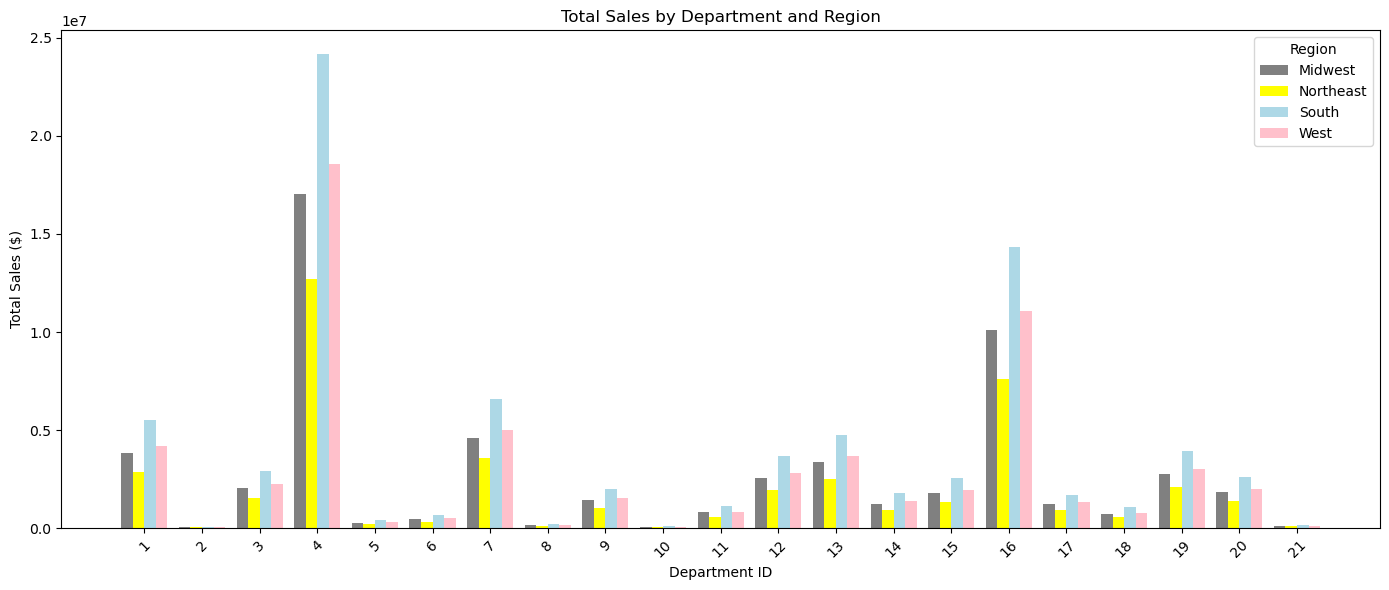

In [183]:
# Aggregate total sales by department and region
dept_region_sales = df410.groupby(['department_id', 'region'])['prices'].sum().unstack().fillna(0)

# Define your color scheme
color_map = {
    'Midwest': 'grey',
    'South': 'lightblue',
    'West': 'pink',
    'Northeast': 'yellow'
}

# Set up figure
plt.figure(figsize=(14, 6))
n_departments = len(dept_region_sales.index)
n_regions = len(dept_region_sales.columns)
bar_width = 0.2
index = np.arange(n_departments)

# Create bars for each region
for i, region in enumerate(dept_region_sales.columns):
    plt.bar(index + i * bar_width,
            dept_region_sales[region],
            width=bar_width,
            label=region,
            color=color_map.get(region, 'gray'))

# Format chart
plt.title('Total Sales by Department and Region')
plt.xlabel('Department ID')
plt.ylabel('Total Sales ($)')
plt.xticks(index + bar_width * (n_regions - 1) / 2, dept_region_sales.index, rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_grouped_department_region_sales_custom_colors.png'), bbox_inches='tight')
plt.show()

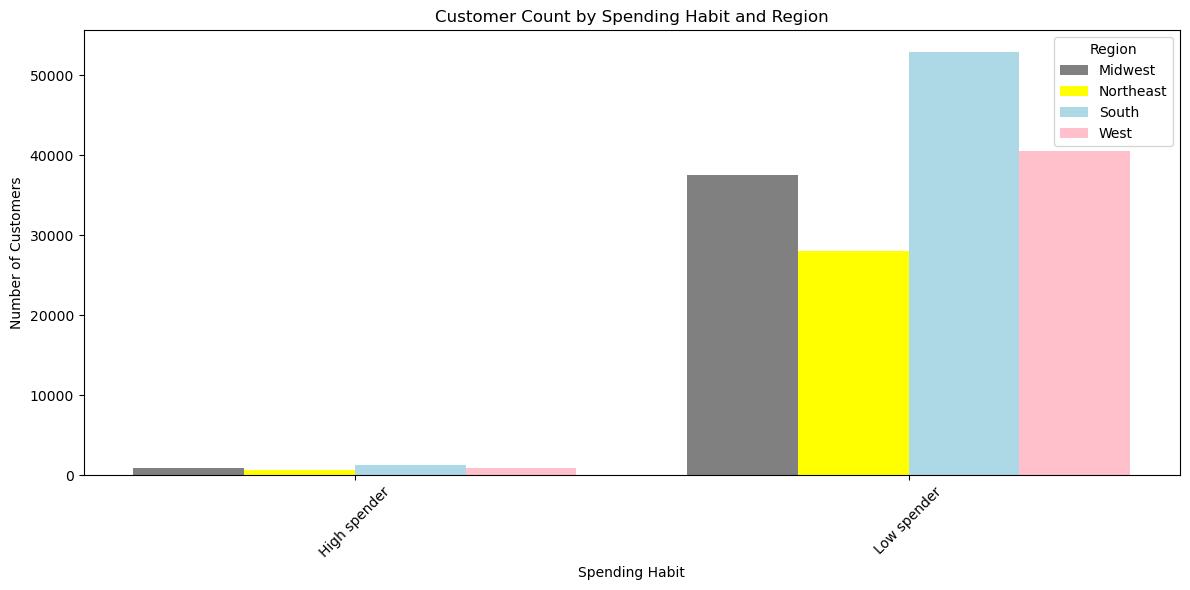

In [189]:
# Aggregate counts of spending habit by region
spending_region_counts = df410.groupby(['spending_habit', 'region'])['user_id'].nunique().unstack().fillna(0)

# Set up figure
plt.figure(figsize=(12, 6))
n_habits = len(spending_region_counts.index)
n_regions = len(spending_region_counts.columns)
bar_width = 0.2
index = np.arange(n_habits)

# Plot each region as its own bar with custom colors
color_map = {
    'Midwest': 'grey',
    'South': 'lightblue',
    'West': 'pink',
    'Northeast': 'yellow'
}

for i, region in enumerate(spending_region_counts.columns):
    plt.bar(index + i * bar_width,
            spending_region_counts[region],
            width=bar_width,
            label=region,
            color=color_map.get(region, 'gray'))

# Format chart
plt.title('Customer Count by Spending Habit and Region')
plt.xlabel('Spending Habit')
plt.ylabel('Number of Customers')
plt.xticks(index + bar_width * (n_regions - 1) / 2, spending_region_counts.index, rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_grouped_spending_habit_region_counts.png'), bbox_inches='tight')
plt.show()

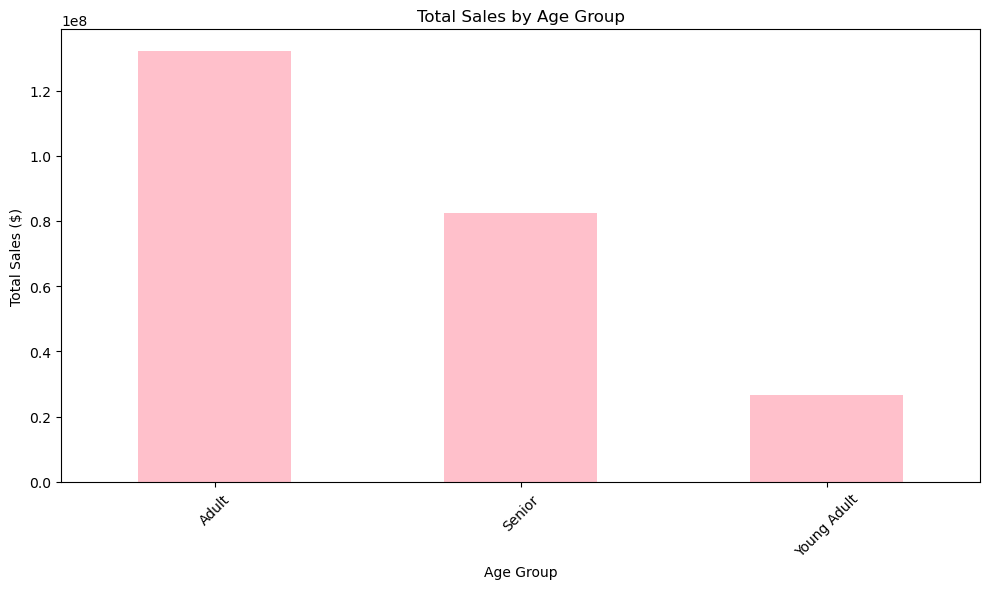

In [199]:
# Aggregate total sales by age group
age_group_sales = df410.groupby('age_group')['prices'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
age_group_sales.plot(kind='bar', color='pink')

plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_sales.png'), bbox_inches='tight')
plt.show()

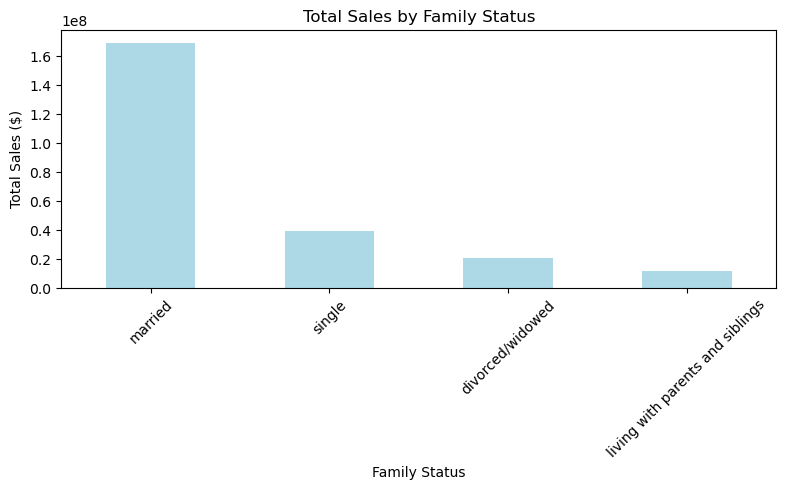

In [201]:
# Aggregate total sales by family status
fam_status_sales = df410.groupby('fam_status')['prices'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
fam_status_sales.plot(kind='bar', color='lightblue')

plt.title('Total Sales by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_fam_status_sales.png'), bbox_inches='tight')
plt.show()

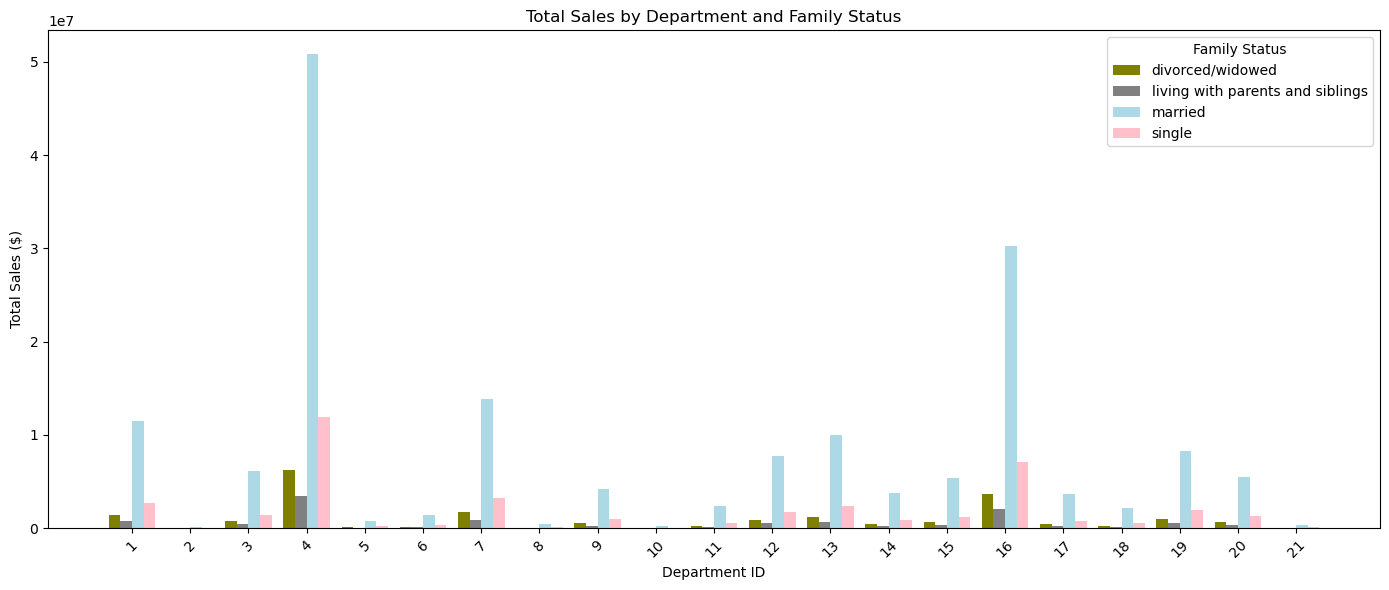

In [207]:
# Aggregate total sales by department and fam_status
dept_fam_sales = df410.groupby(['department_id', 'fam_status'])['prices'].sum().unstack().fillna(0)

# Setup figure
plt.figure(figsize=(14, 6))
n_departments = len(dept_fam_sales.index)
n_fam_statuses = len(dept_fam_sales.columns)
bar_width = 0.2
index = np.arange(n_departments)

# Define color map for your known family status categories
color_map = {
    'married': 'lightblue',
    'single': 'pink',
    'divorced/widowed': 'olive',
    'living with parents and siblings': 'grey'
}

# Plot each family status as its own bar
for i, status in enumerate(dept_fam_sales.columns):
    plt.bar(index + i * bar_width,
            dept_fam_sales[status],
            width=bar_width,
            label=status,
            color=color_map.get(status, 'gray'))

# Format chart
plt.title('Total Sales by Department and Family Status')
plt.xlabel('Department ID')
plt.ylabel('Total Sales ($)')
plt.xticks(index + bar_width * (n_fam_statuses - 1) / 2, dept_fam_sales.index, rotation=45)
plt.legend(title='Family Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_grouped_department_fam_status_sales.png'), bbox_inches='tight')
plt.show()

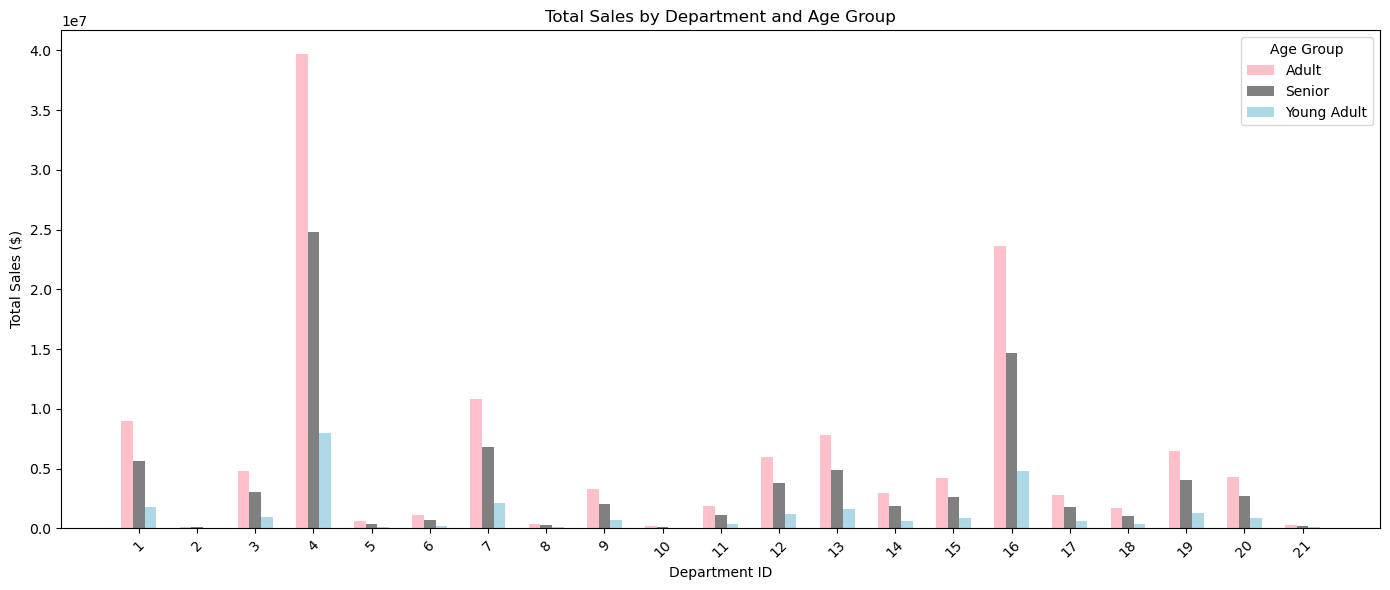

In [205]:
# Aggregate total sales by department and age_group
dept_age_sales = df410.groupby(['department_id', 'age_group'])['prices'].sum().unstack().fillna(0)

# Setup figure
plt.figure(figsize=(14, 6))
n_departments = len(dept_age_sales.index)
n_age_groups = len(dept_age_sales.columns)
bar_width = 0.2
index = np.arange(n_departments)

# Define color map for your age groups
color_map = {
    'Young Adult': 'lightblue',
    'Adult': 'pink',
    'Senior': 'grey',
    'Unknown': 'gray'
}

# Plot each age group as its own bar
for i, age in enumerate(dept_age_sales.columns):
    plt.bar(index + i * bar_width,
            dept_age_sales[age],
            width=bar_width,
            label=age,
            color=color_map.get(age, 'gray'))

# Format chart
plt.title('Total Sales by Department and Age Group')
plt.xlabel('Department ID')
plt.ylabel('Total Sales ($)')
plt.xticks(index + bar_width * (n_age_groups - 1) / 2, dept_age_sales.index, rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_grouped_department_age_group_sales.png'), bbox_inches='tight')
plt.show()

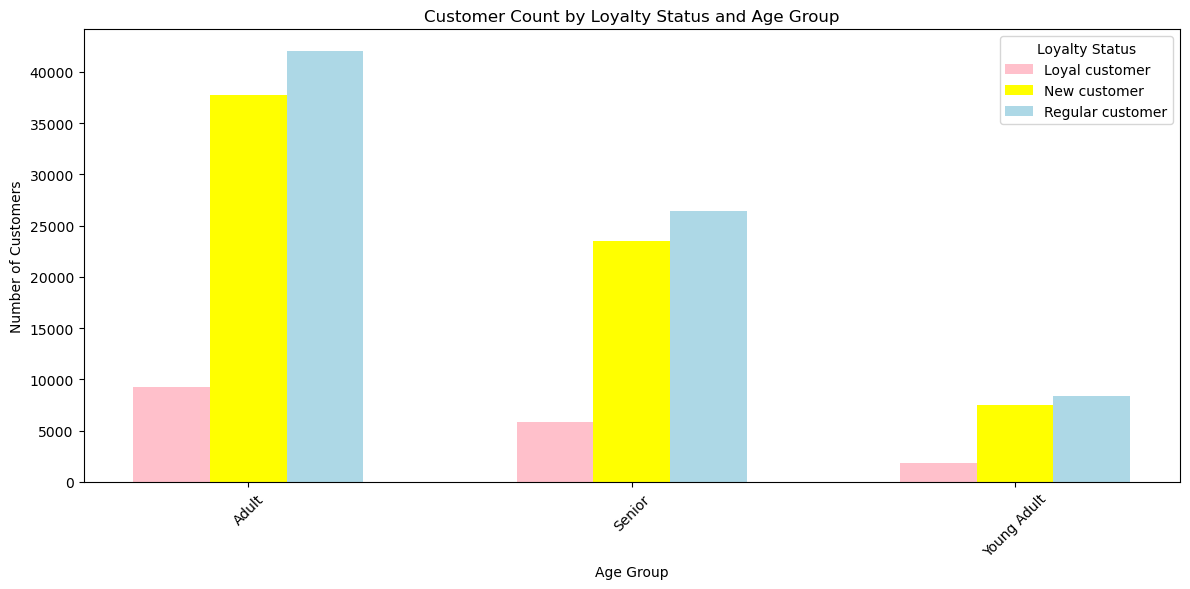

In [213]:
# Aggregate number of customers by loyalty_flag and age_group
loyalty_age_counts = df410.groupby(['age_group', 'loyalty_flag'])['user_id'].nunique().unstack().fillna(0)

# Setup figure
plt.figure(figsize=(12, 6))
n_age_groups = len(loyalty_age_counts.index)
n_loyalty_flags = len(loyalty_age_counts.columns)
bar_width = 0.2
index = np.arange(n_age_groups)

# Define color map for loyalty_flag
color_map = {
    'Loyal customer': 'pink',
    'Regular customer': 'lightblue',
    'New customer': 'yellow'
}

# Plot each loyalty flag as its own bar
for i, flag in enumerate(loyalty_age_counts.columns):
    plt.bar(index + i * bar_width,
            loyalty_age_counts[flag],
            width=bar_width,
            label=flag,
            color=color_map.get(flag, 'gray'))

# Format chart
plt.title('Customer Count by Loyalty Status and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(index + bar_width * (n_loyalty_flags - 1) / 2, loyalty_age_counts.index, rotation=45)
plt.legend(title='Loyalty Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_grouped_loyalty_flag_age_group_counts.png'), bbox_inches='tight')
plt.show()

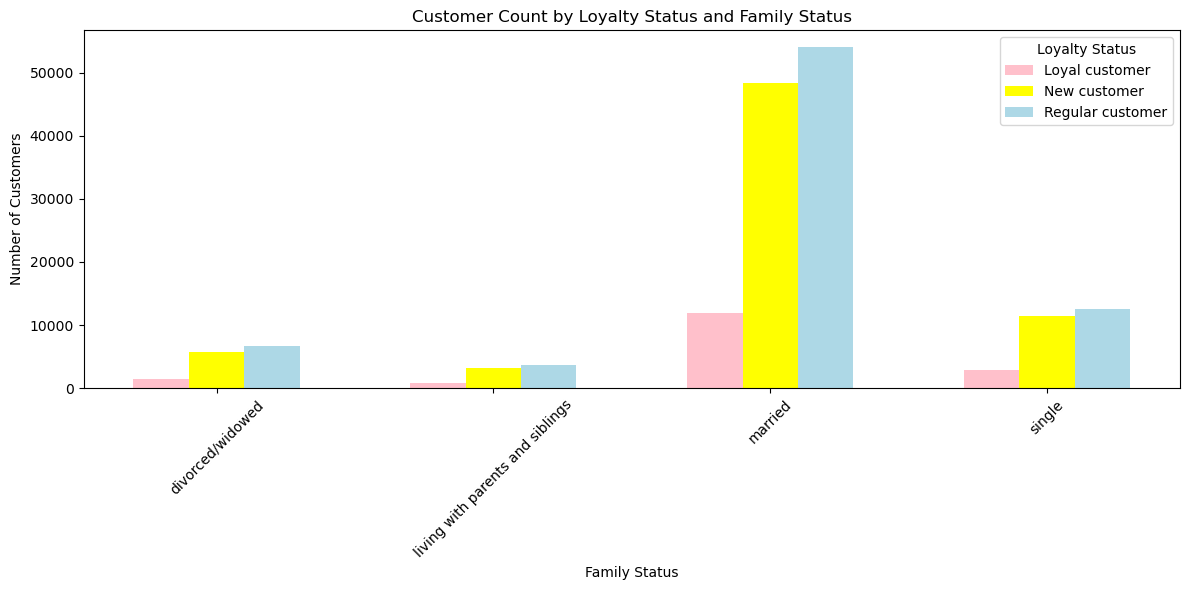

In [219]:
# Aggregate number of customers by fam_status and loyalty_flag
loyalty_fam_counts = df410.groupby(['fam_status', 'loyalty_flag'])['user_id'].nunique().unstack().fillna(0)

# Setup figure
plt.figure(figsize=(12, 6))
n_fam_statuses = len(loyalty_fam_counts.index)
n_loyalty_flags = len(loyalty_fam_counts.columns)
bar_width = 0.2
index = np.arange(n_fam_statuses)

# Define color map (adapting your scheme)
color_map = {
    'Loyal customer': 'pink',
    'Regular customer': 'lightblue',
    'New customer': 'yellow'
}

# Plot each loyalty flag as its own bar
for i, flag in enumerate(loyalty_fam_counts.columns):
    plt.bar(index + i * bar_width,
            loyalty_fam_counts[flag],
            width=bar_width,
            label=flag,
            color=color_map.get(flag, 'gray'))

# Format chart
plt.title('Customer Count by Loyalty Status and Family Status')
plt.xlabel('Family Status')
plt.ylabel('Number of Customers')
plt.xticks(index + bar_width * (n_loyalty_flags - 1) / 2, loyalty_fam_counts.index, rotation=45)
plt.legend(title='Loyalty Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_grouped_loyalty_flag_fam_status_counts_custom_colors.png'), bbox_inches='tight')
plt.show()

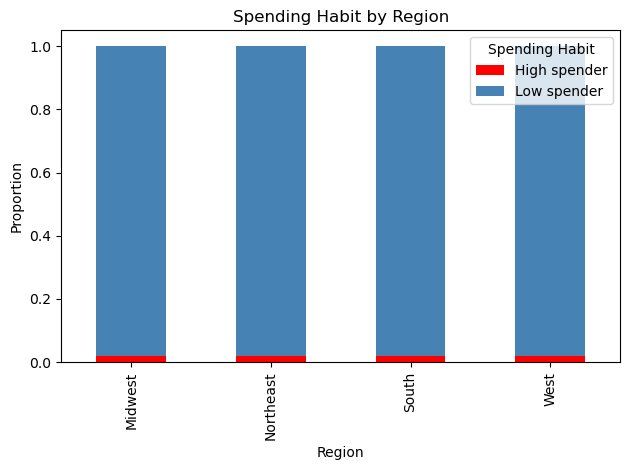

In [82]:
# Spending Habit by Region
categories = ['High spender', 'Low spender']
colors = ['red', 'steelblue']

crosstab = pd.crosstab(df410['region'], df410['spending_habit'], normalize='index').reindex(columns=categories, fill_value=0)
crosstab.plot(kind='bar', stacked=True, color=colors)
plt.title('Spending Habit by Region')
plt.ylabel('Proportion')
plt.xlabel('Region')
plt.legend(title='Spending Habit')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_by_region.png'), bbox_inches='tight')

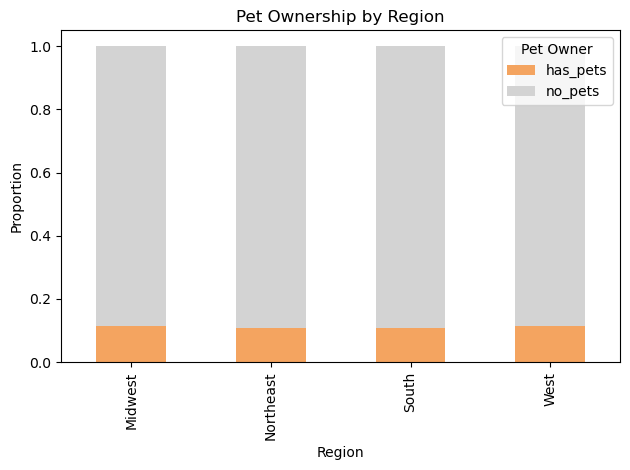

In [83]:
# Pet Ownership by Region
categories = ['has_pets', 'no_pets']
colors = ['sandybrown', 'lightgray']

crosstab = pd.crosstab(df410['region'], df410['pet_owner'], normalize='index').reindex(columns=categories, fill_value=0)
crosstab.plot(kind='bar', stacked=True, color=colors)
plt.title('Pet Ownership by Region')
plt.ylabel('Proportion')
plt.xlabel('Region')
plt.legend(title='Pet Owner')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owner_by_region.png'), bbox_inches='tight')

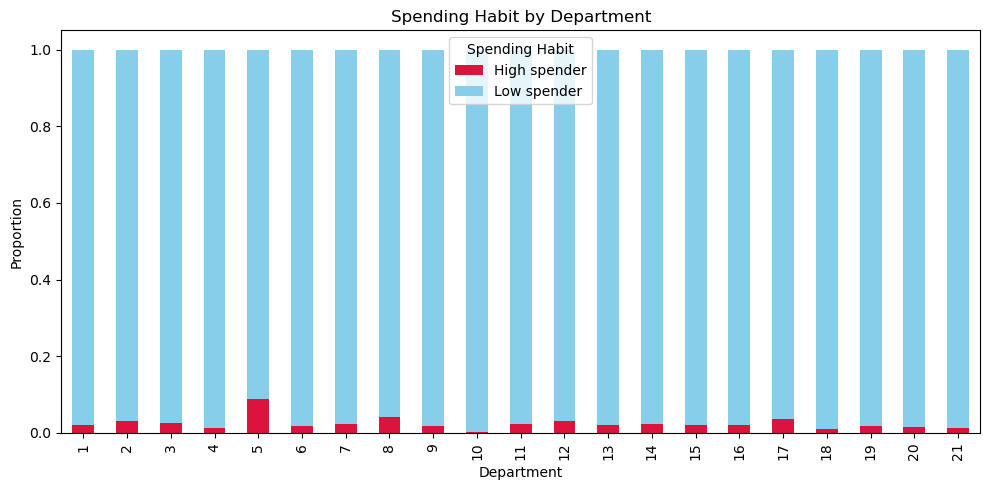

In [84]:
# Spending Habit by Department
categories = ['High spender', 'Low spender']
colors = ['crimson', 'skyblue']

crosstab = pd.crosstab(df410['department_id'], df410['spending_habit'], normalize='index').reindex(columns=categories, fill_value=0)
crosstab.plot(kind='bar', stacked=True, color=colors, figsize=(10,5))
plt.title('Spending Habit by Department')
plt.ylabel('Proportion')
plt.xlabel('Department')
plt.legend(title='Spending Habit')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_by_department.png'), bbox_inches='tight')

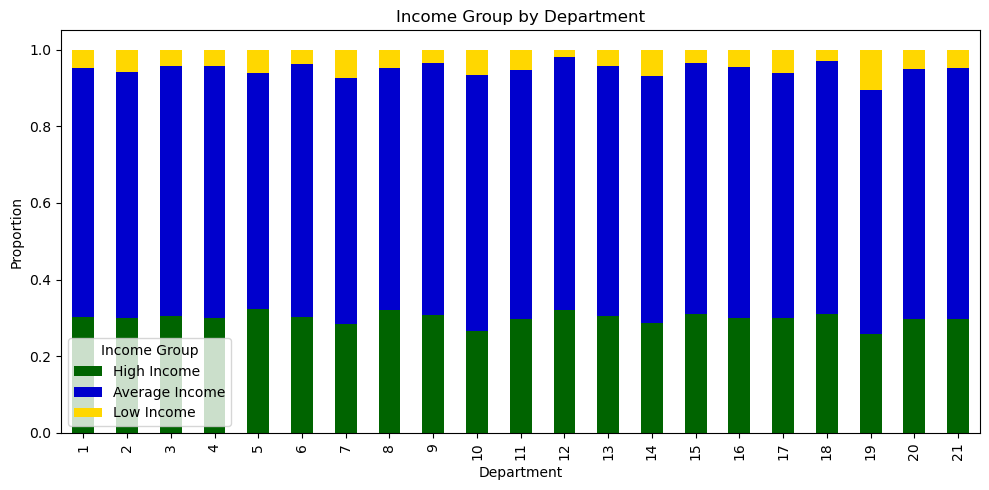

In [85]:
# Income Group by Department
categories = ['High Income', 'Average Income', 'Low Income']
colors = ['darkgreen', 'mediumblue', 'gold']

crosstab = pd.crosstab(df410['department_id'], df410['income_group'], normalize='index').reindex(columns=categories, fill_value=0)
crosstab.plot(kind='bar', stacked=True, color=colors, figsize=(10,5))
plt.title('Income Group by Department')
plt.ylabel('Proportion')
plt.xlabel('Department')
plt.legend(title='Income Group')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_by_department.png'), bbox_inches='tight')

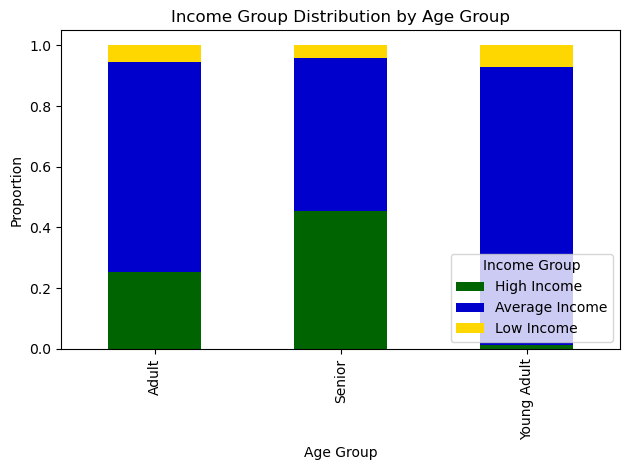

In [86]:
# Age Group by Income Group
categories = ['High Income', 'Average Income', 'Low Income']
colors = ['darkgreen', 'mediumblue', 'gold']

crosstab = pd.crosstab(df410['age_group'], df410['income_group'], normalize='index').reindex(columns=categories, fill_value=0)
crosstab.plot(kind='bar', stacked=True, color=colors)
plt.title('Income Group Distribution by Age Group')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.legend(title='Income Group')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_by_age_group.png'), bbox_inches='tight')